# DBSCAN

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [18]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)


In [19]:
X_m ,y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
    )

## Visualización de datos

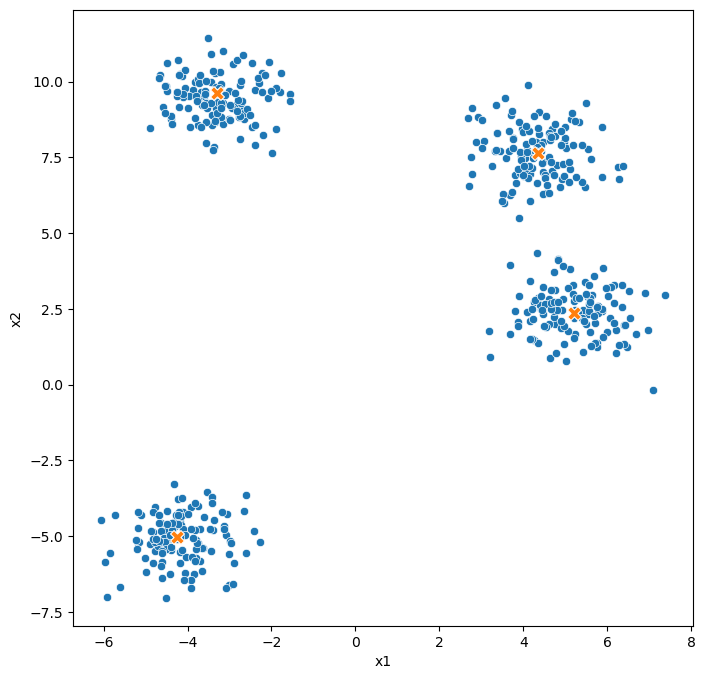

In [20]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s = 100)
plt.plot()
plt.show()

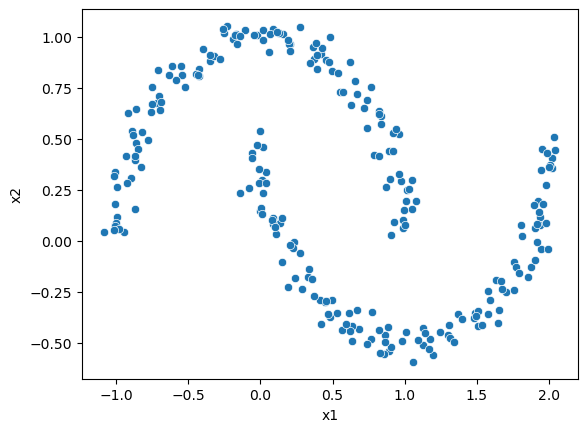

In [13]:
sns.scatterplot(data=df_moons, x='x1',y='x2')
plt.show()

## Implementando DBSCAN

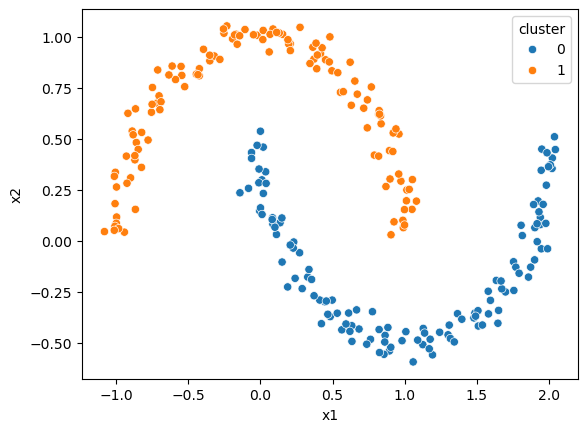

In [22]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1',y='x2', hue='cluster')
plt.show()

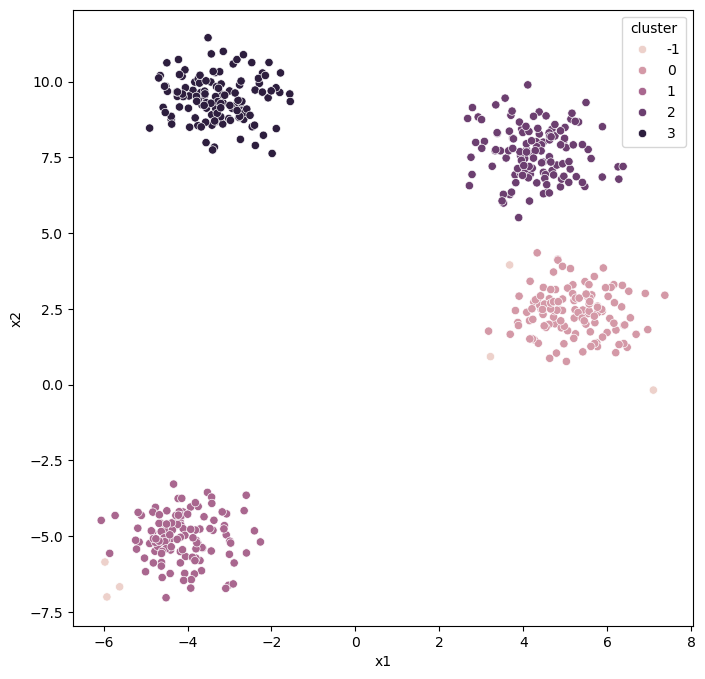

In [28]:
dbscan = DBSCAN(eps=0.7, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict 

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()


## Hyperparameters

In [33]:
from sklearn.neighbors import NearestNeighbors

In [34]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

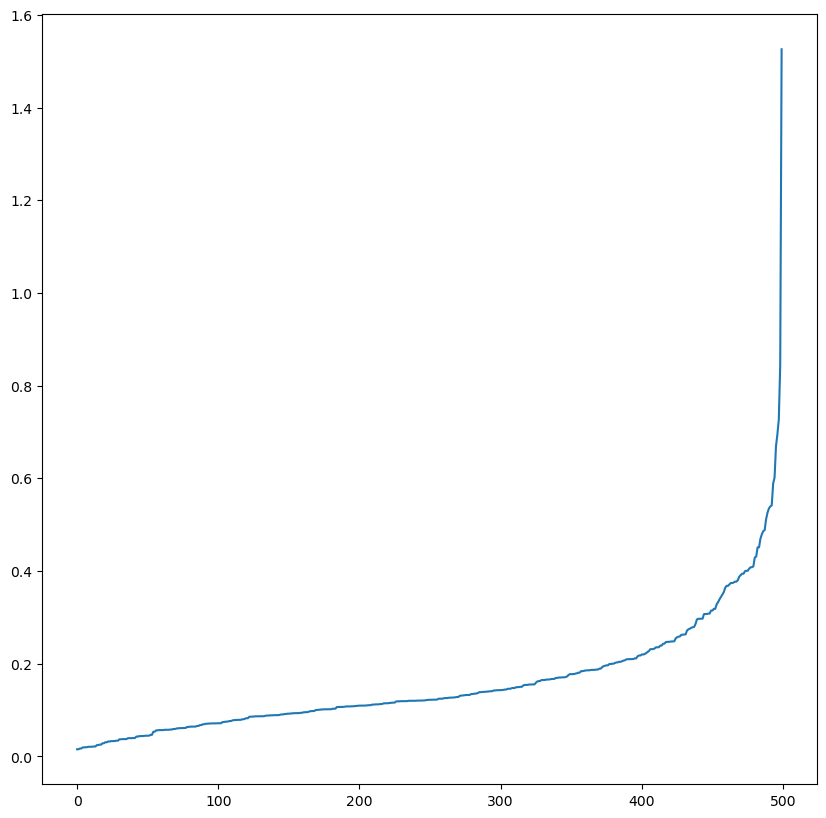

In [35]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [36]:
eps_values = np.arange(0.25, 0.8, 0.10) 
min_samples = np.arange(2,10)

In [38]:
print(eps_values,min_samples)

[0.25 0.35 0.45 0.55 0.65 0.75] [2 3 4 5 6 7 8 9]


In [37]:
from itertools import product

In [39]:
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []

for p in dbscan_paramns: 
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_pred))


In [43]:
sil_scores

[-0.0646474294690579,
 -0.08958050247325947,
 -0.16260373310015908,
 -0.2832259661237152,
 -0.31515860337395035,
 -0.38538368331369527,
 -0.44110343425645776,
 -0.5735317212890076,
 -0.008310581964967263,
 0.06773954202602017,
 0.1639827791213659,
 0.0321655362199414,
 0.21714679726811226,
 0.12255448123310038,
 0.07913836536236848,
 0.0968490435981704,
 0.12646388806012118,
 0.1873127011840728,
 0.39641906355778606,
 0.5192778029584884,
 0.604686609918727,
 0.5590366180201566,
 0.3885654598974172,
 0.36045790702364605,
 0.46305340690063324,
 0.5230162520640215,
 0.6125792097201266,
 0.705065011394001,
 0.689927734388782,
 0.6675348356085327,
 0.6497961072086912,
 0.6213058350541617,
 0.6214146506263077,
 0.6473300097436527,
 0.7304493194366396,
 0.7254063752458442,
 0.7254063752458442,
 0.7223157988262368,
 0.7065789686503652,
 0.7021557564986174,
 0.6254735996668135,
 0.7618667788772189,
 0.7522506348903372,
 0.7520368133965575,
 0.7526420519828654,
 0.7474839215017808,
 0.7474839215

In [44]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores

In [45]:
print(df_paramns_tunning)

     Eps  Min_Samples  sil_scores
0   0.25            2   -0.064647
1   0.25            3   -0.089581
2   0.25            4   -0.162604
3   0.25            5   -0.283226
4   0.25            6   -0.315159
5   0.25            7   -0.385384
6   0.25            8   -0.441103
7   0.25            9   -0.573532
8   0.35            2   -0.008311
9   0.35            3    0.067740
10  0.35            4    0.163983
11  0.35            5    0.032166
12  0.35            6    0.217147
13  0.35            7    0.122554
14  0.35            8    0.079138
15  0.35            9    0.096849
16  0.45            2    0.126464
17  0.45            3    0.187313
18  0.45            4    0.396419
19  0.45            5    0.519278
20  0.45            6    0.604687
21  0.45            7    0.559037
22  0.45            8    0.388565
23  0.45            9    0.360458
24  0.55            2    0.463053
25  0.55            3    0.523016
26  0.55            4    0.612579
27  0.55            5    0.705065
28  0.55      

In [41]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',index='Min_Samples',columns='Eps')

In [46]:
print(pivot_data)

Eps              0.25      0.35      0.45      0.55      0.65      0.75
Min_Samples                                                            
2           -0.064647 -0.008311  0.126464  0.463053  0.621415  0.625474
3           -0.089581  0.067740  0.187313  0.523016  0.647330  0.761867
4           -0.162604  0.163983  0.396419  0.612579  0.730449  0.752251
5           -0.283226  0.032166  0.519278  0.705065  0.725406  0.752037
6           -0.315159  0.217147  0.604687  0.689928  0.725406  0.752642
7           -0.385384  0.122554  0.559037  0.667535  0.722316  0.747484
8           -0.441103  0.079138  0.388565  0.649796  0.706579  0.747484
9           -0.573532  0.096849  0.360458  0.621306  0.702156  0.739729


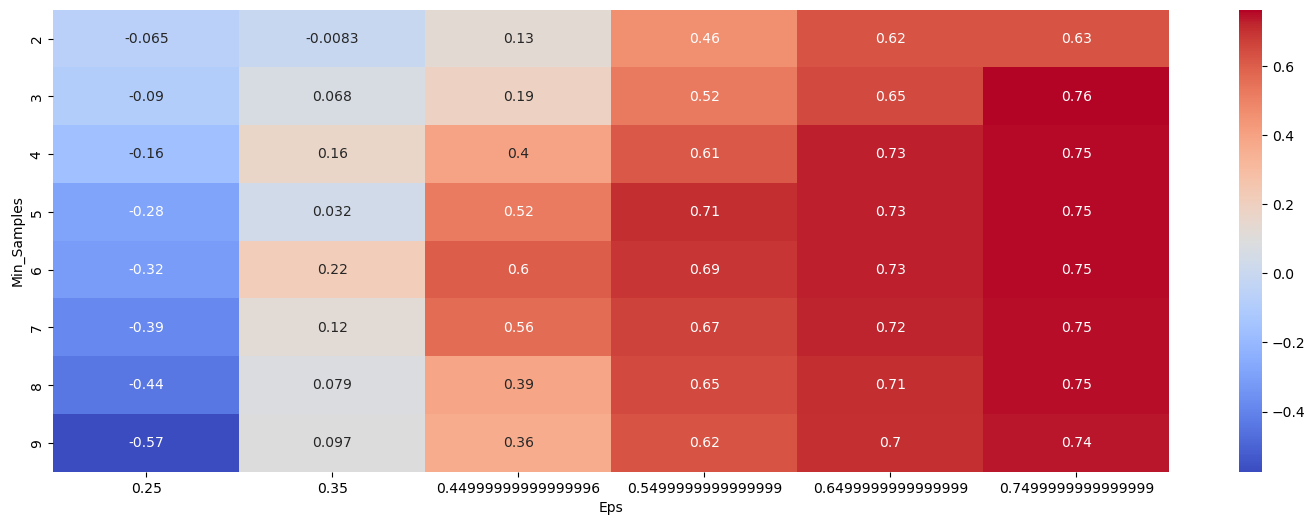

In [49]:
fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()

## Evaluación de DBSCAN

In [59]:
dbscan_cluster = DBSCAN(eps=0.76, min_samples=3)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

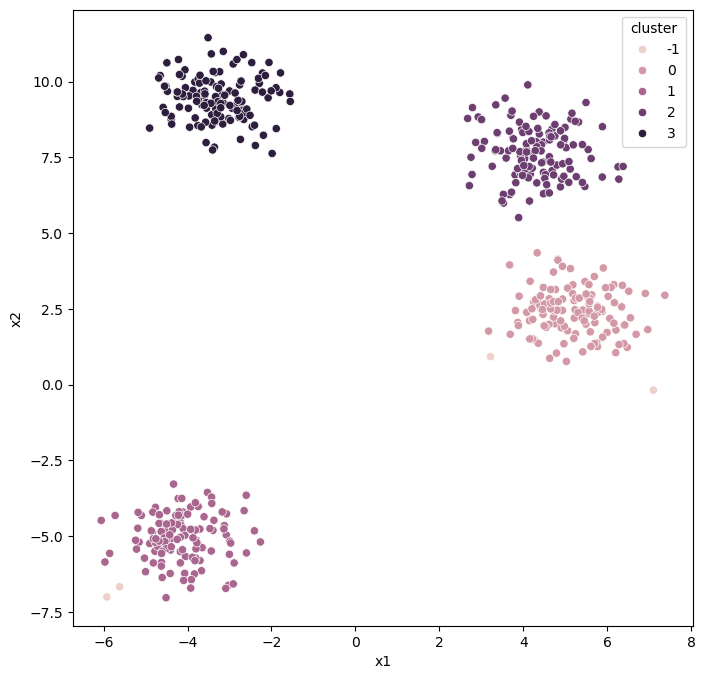

In [60]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()

For n_clusters = 10 The average silhouette_score is : 0.23954295735208866


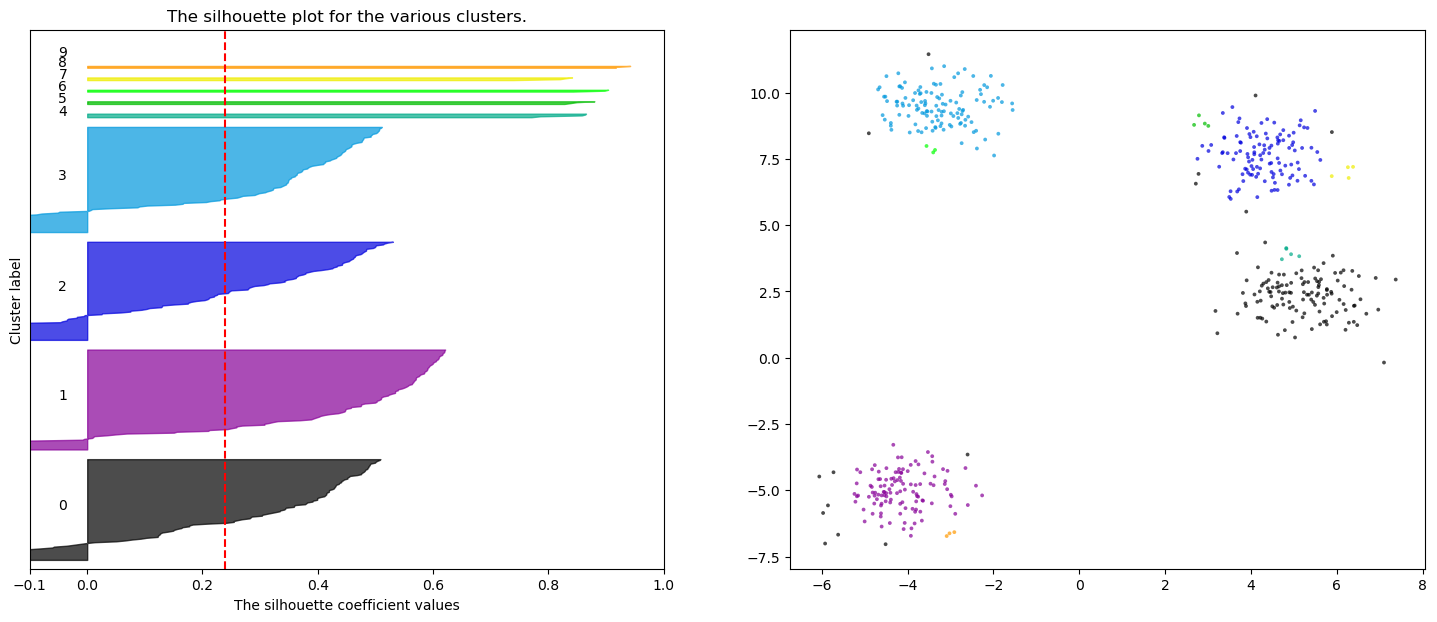

In [61]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()